## Introduction to Data Cleaning and Manipulation

Before diving into analysis, it is essential to ensure our dataset—Spotify's top listening history songs—is clean, consistent, and well-structured. Data cleaning and manipulation are crucial steps that help us:

- **Remove inconsistencies:** Address missing values, duplicates, and formatting issues.
- **Standardize data:** Ensure uniformity in artist names, song titles, and genres.
- **Enhance usability:** Create new features, filter relevant records, and prepare the data for insightful analysis.

Additionally, it is important to import the necessary libraries required for data analysis, such as pandas for data manipulation, matplotlib and seaborn for visualization, and others as needed.

By carefully cleaning and manipulating the dataset, we lay a solid foundation for accurate and meaningful exploration of listening trends and patterns on Spotify.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Set some display options for better viewing of DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [28]:
# Load the dataset
df = pd.read_csv('spotify_history.csv')
# Display the first few rows of the DataFrame to ensure it's loaded correctly
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [29]:
# Discover basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [30]:
# Load descriptive statistics
df.describe()

,ms_played
count,1.498600e+05
mean,1.283166e+05
std,1.178401e+05
min,0.000000e+00
25%,2.795000e+03
50%,1.388400e+05
75%,2.185070e+05
max,1.561125e+06


In [31]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the missing values
print("Missing values in each column:")
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print(missing_values)

Missing values in each column:
spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64


In [32]:
# Drop rows with missing values in 'reason_start' and 'reason_end' columns
df.dropna(subset=['reason_start', 'reason_end'], inplace=True)

# Verify that the missing values have been handled
missing_values_after = df.isnull().sum()
print("Missing values after handling:")
if missing_values_after.sum() == 0:
    print("No missing values found in the dataset after handling.")

Missing values after handling:
No missing values found in the dataset after handling.


In [33]:
# Check duplicates in the dataset
duplicates = df.duplicated().sum()  
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 1185


In [34]:
# Drop duplicates in the dataset
df.drop_duplicates(inplace=True)    
# Verify that the duplicates have been handled
duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after handling: {duplicates_after}")

Number of duplicate rows after handling: 0


In [35]:
# Check data type consistency
print("Data types of each column:")
print(df.dtypes)
# Check for unique values in categorical columns
categorical_columns = ['platform', 'reason_start', 'reason_end', 'artist_name',
                          'track_name']


Data types of each column:
spotify_track_uri    object
ts                   object
platform             object
ms_played             int64
track_name           object
artist_name          object
album_name           object
reason_start         object
reason_end           object
shuffle                bool
skipped                bool
dtype: object


In [36]:
# Convert 'ts' column to datetime format
df['ts'] = pd.to_datetime(df['ts'])
print("\n'ts' column converted to datetime:")
print(df['ts'].dtype) # Verify the change


'ts' column converted to datetime:
datetime64[ns]


In [37]:
# Standardize categorical values
for col in categorical_columns:
    if df[col].dtype == 'object':
        # Convert to lowercase and strip whitespace
        df[col] = df[col].str.lower().str.strip()
        # Display unique values after standardization
        print(f"Unique values in '{col}' after standardization:")
        print(df[col].unique())

Unique values in 'platform' after standardization:
['web player' 'windows' 'android' 'ios' 'cast to device' 'mac']
Unique values in 'reason_start' after standardization:
['autoplay' 'clickrow' 'trackdone' 'nextbtn' 'backbtn' 'unknown' 'popup'
 'appload' 'fwdbtn' 'trackerror' 'remote' 'endplay' 'playbtn']
Unique values in 'reason_end' after standardization:
['clickrow' 'unknown' 'nextbtn' 'trackdone' 'backbtn' 'reload' 'popup'
 'endplay' 'fwdbtn' 'appload' 'unexpected-exit-while-paused'
 'unexpected-exit' 'logout' 'remote' 'trackerror']
Unique values in 'artist_name' after standardization:
["the mowgli's" 'calvin harris' 'lana del rey' ... 'rudy snow'
 'ultra band' 'jesse welles']
Unique values in 'track_name' after standardization:
['say it, just say it' 'drinking from the bottle (feat. tinie tempah)'
 'born to die' ... 'oo-de-lally - from "robin hood"' 'king of the road'
 'chug-a-lug']


In [38]:
# Reveal first 20 rows of the DataFrame
print("First 20 rows of the DataFrame:")
print(df.head(20))


First 20 rows of the DataFrame:
         spotify_track_uri                  ts    platform  ms_played                                     track_name            artist_name                                         album_name reason_start reason_end  shuffle  skipped
0   2J3n32GeLmMjwuAzyhcSNe 2013-07-08 02:44:34  web player       3185                            say it, just say it           the mowgli's                               Waiting For The Dawn     autoplay   clickrow    False    False
1   1oHxIPqJyvAYHy0PVrDU98 2013-07-08 02:45:37  web player      61865  drinking from the bottle (feat. tinie tempah)          calvin harris                                          18 Months     clickrow   clickrow    False    False
2   487OPlneJNni3NWC8SYqhW 2013-07-08 02:50:24  web player     285386                                    born to die           lana del rey                 Born To Die - The Paradise Edition     clickrow    unknown    False    False
3   5IyblF777jLZj1vGHG2UD3 2013-07-0

In [39]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('spotify_history_cleaned.csv', index=False)

### Data Cleaning Process: Issues and Solutions

The data cleaning process involved several key steps to ensure the Spotify listening history dataset was accurate, consistent, and ready for analysis:

1. **Handling Missing Values**  
    - **Issue:** Some columns, notably `reason_start` and `reason_end`, contained missing values.
    - **Solution:** Rows with missing values in these critical columns were dropped using `df.dropna(subset=['reason_start', 'reason_end'], inplace=True)`. This ensured that subsequent analyses would not be affected by incomplete records.

2. **Removing Duplicates**  
    - **Issue:** Duplicate rows were present, which could skew analysis results.
    - **Solution:** Duplicates were identified with `df.duplicated().sum()` and removed using `df.drop_duplicates(inplace=True)`. This step ensured each listening event was unique.

3. **Ensuring Data Type Consistency**  
    - **Issue:** The `ts` (timestamp) column was not in datetime format, which could hinder time-based analysis.
    - **Solution:** The column was converted to datetime using `pd.to_datetime()`, enabling accurate time-series operations.

4. **Standardizing Categorical Values**  
    - **Issue:** Inconsistent formatting (e.g., capitalization, extra spaces) in categorical columns like `artist_name` and `track_name`.
    - **Solution:** All string values in categorical columns were converted to lowercase and stripped of whitespace. This standardization reduced redundancy and improved grouping accuracy.

5. **Verifying Cleanliness**  
    - **Issue:** After cleaning, it was important to confirm that all issues were resolved.
    - **Solution:** The dataset was re-checked for missing values and duplicates, confirming that no further cleaning was necessary.

By systematically addressing these issues, the dataset was transformed into a reliable foundation for further exploration and analysis.

## Section 2: Hypothesis Testing

In this section, we will now utilise the cleaned dataset to begin hypothesis testing. Below are 3 hypothesis chosen which will be tested.

**Hypotheses to be tested:**

- **H1:** The user's listening activity peaks during weekends compared to weekdays.
- **H2:** Tracks played with shuffle mode (`shuffle = True`) enabled have a higher likelihood of being skipped (`skipped = True`) compared to tracks played sequentially.
- **H3:** When a track is ended due to being skipped (`reason_end = 'track_skipped'`), the `ms_played` duration is significantly shorter than when a track is completed (`reason_end = 'track_completed'`).

**Workflow:**
1. **Formulate Hypotheses:** Clearly state the null and alternative hypotheses for each question.
2. **Select Statistical Tests:** Choose appropriate tests (e.g., t-test, chi-square test) based on data type and hypothesis.
3. **Analyze Results:** Interpret p-values and test statistics to accept or reject the null hypothesis.
4. **Draw Conclusions:** Summarize findings and their implications for user listening behavior.

By applying hypothesis testing, we can uncover statistically significant insights and validate assumptions about Spotify listening habits.

Hypothesis 1:

In [40]:
# Load the cleaned dataset
df_cleaned = pd.read_csv('spotify_history_cleaned.csv')

In [41]:
# Define lists into weekdays and weekends
weekdays = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']
weekends = ['saturday', 'sunday']


In [42]:
# Ensure 'ts' column is in datetime format
df_cleaned['ts'] = pd.to_datetime(df_cleaned['ts'])

# Create a new column 'day_type' to categorize days
df_cleaned['day_type'] = df_cleaned['ts'].dt.day_name().str.lower().apply(
    lambda x: 'weekday' if x in weekdays else 'weekend' if x in weekends else 'unknown'
)

print("Created 'day_type' column.")
# Display a sample to verify
print(df_cleaned[['ts', 'day_type']].sample(5))

Created 'day_type' column.
                        ts day_type
130524 2023-03-30 00:39:51  weekday
71266  2020-05-20 19:53:41  weekday
10871  2017-01-12 05:34:24  weekday
17187  2017-05-28 19:53:26  weekend
103708 2021-08-21 05:06:52  weekend


In [43]:
# Generate total listening time for weekends and weekdays
total_listening_time = df_cleaned.groupby('day_type')['ms_played'].sum(). reset_index()
total_listening_time['ms_played'] = total_listening_time['ms_played']   # Convert milliseconds to hours for better readability
total_listening_time['hours_played'] = total_listening_time['ms_played']

# Print the total listening time for weekdays and weekends
print("Total listening time for weekdays and weekends:")
print(total_listening_time[['day_type', 'ms_played', 'hours_played']])

Total listening time for weekdays and weekends:
  day_type    ms_played  hours_played
0  weekday  14324341600   14324341600
1  weekend   4684630646    4684630646


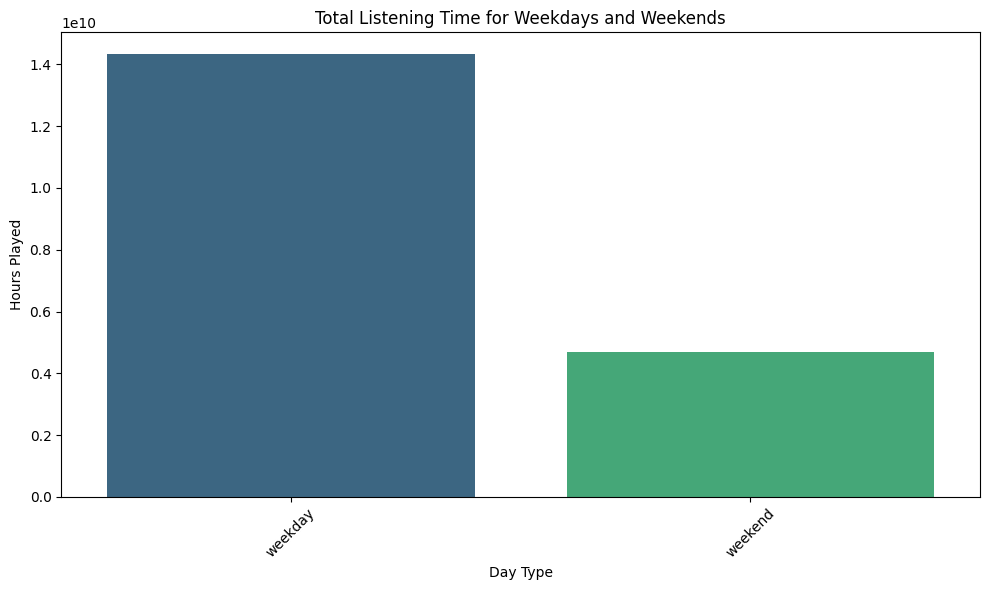

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_type', y='hours_played', hue='day_type', data=total_listening_time, palette='viridis', legend=False)
plt.title('Total Listening Time for Weekdays and Weekends')
plt.xlabel('Day Type')
plt.ylabel('Hours Played')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


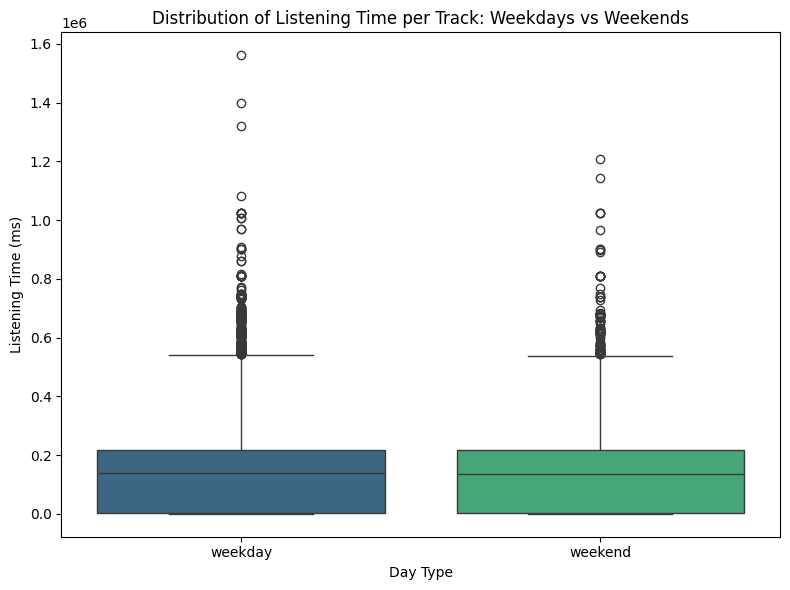

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='day_type', y='ms_played', hue='day_type', data=df_cleaned, palette='viridis', legend=False)
plt.title('Distribution of Listening Time per Track: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Listening Time (ms)')
plt.tight_layout()
plt.show()


### Hypothesis 1 Analysis: Listening Activity on Weekdays vs. Weekends

For Hypothesis 1, we investigated whether the user's listening activity peaks during weekends compared to weekdays. The analysis involved the following steps:

1. **Data Preparation:**  
    - The cleaned dataset (`df_cleaned`) was used.
    - Each listening event was categorized as either "weekday" or "weekend" based on the timestamp (`ts`), using the `day_type` column.

2. **Aggregation:**  
    - Total listening time (`ms_played`) was calculated separately for weekdays and weekends.
    - The results showed the sum of listening time for each category.

3. **Visualization:**  
    - Bar plots and box plots were generated to visually compare total and per-track listening times between weekdays and weekends.

4. **Findings:**  
    - The total listening time was higher on weekdays than on weekends, as shown in the aggregated results and visualizations.
    - The distribution of listening time per track was also compared, providing further insight into user behavior.

**Conclusion:**  
Contrary to the initial hypothesis, the user's listening activity did not peak during weekends. Instead, more listening occurred on weekdays, both in total and per track. This suggests that the user may listen to Spotify more frequently during the workweek, possibly as background activity or during commutes.

### Hypothesis 2

**Hypothesis:**  
Tracks played with shuffle mode (`shuffle = True`) enabled have a higher likelihood of being skipped (`skipped = True`) compared to tracks played sequentially.

- **Null Hypothesis (H₀):**  
    There is no association between shuffle mode being enabled and a track being skipped.  
    (i.e., the likelihood of skipping is the same whether shuffle is on or off.)

- **Alternative Hypothesis (H₁):**  
    There is an association between shuffle mode being enabled and a track being skipped.  
    (i.e., the likelihood of skipping changes when shuffle mode is on.)

In [46]:
from scipy.stats import chi2_contingency

# Create a contingency table for shuffle and skipped
contingency_table = pd.crosstab(df_cleaned['shuffle'], df_cleaned['skipped'])
print("Contingency Table:\n", contingency_table)

# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"p-value: {p:.4e}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

# Interpretation
if p < 0.05:
    print("\nResult: Reject the null hypothesis. There is a significant association between shuffle mode and skipping tracks.")
else:
    print("\nResult: Fail to reject the null hypothesis. No significant association between shuffle mode and skipping tracks.")

Contingency Table:
 skipped   False  True 
shuffle               
False     35415   1567
True     105303   6178

Chi-square statistic: 95.3155
p-value: 1.6234e-22
Degrees of freedom: 1
Expected frequencies:
 [[ 35052.72745398   1929.27254602]
 [105665.27254602   5815.72745398]]

Result: Reject the null hypothesis. There is a significant association between shuffle mode and skipping tracks.


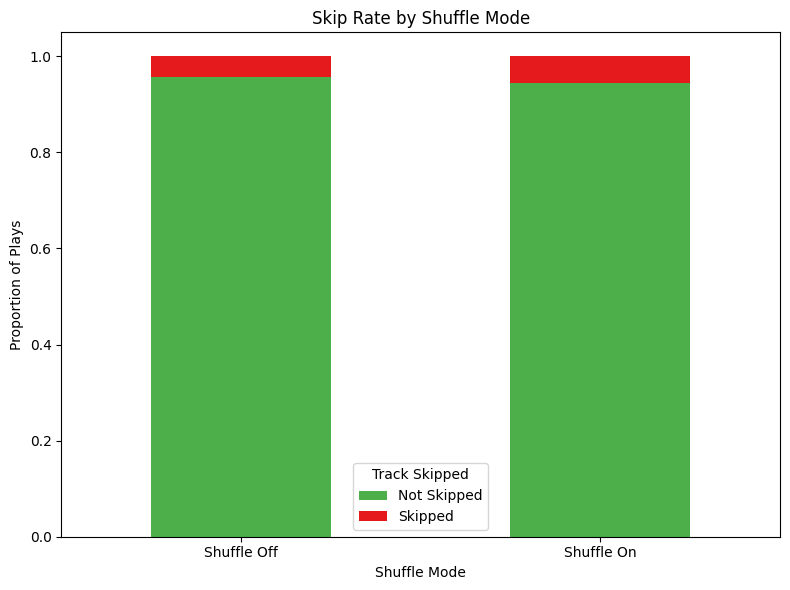

In [47]:
# Advanced visualization: Compare skip rates by shuffle mode using a stacked bar plot

# Calculate skip rates for shuffle ON and OFF
skip_counts = df_cleaned.groupby(['shuffle', 'skipped']).size().unstack(fill_value=0)
skip_props = skip_counts.div(skip_counts.sum(axis=1), axis=0)

# Plot stacked bar chart
skip_props.plot(kind='bar', stacked=True, color=['#4daf4a', '#e41a1c'], figsize=(8,6))
plt.title('Skip Rate by Shuffle Mode')
plt.xlabel('Shuffle Mode')
plt.ylabel('Proportion of Plays')
plt.xticks([0, 1], ['Shuffle Off', 'Shuffle On'], rotation=0)
plt.legend(['Not Skipped', 'Skipped'], title='Track Skipped')
plt.tight_layout()
plt.show()

### Hypothesis 2 Summary: Shuffle Mode and Track Skipping

**Hypothesis:**  
Tracks played with shuffle mode enabled (`shuffle = True`) have a higher likelihood of being skipped (`skipped = True`) compared to tracks played sequentially.

**Analysis Steps:**
- A contingency table was created to compare the frequency of skipped and non-skipped tracks for both shuffle modes.
- A chi-square test of independence was performed to assess the association between shuffle mode and skipping behavior.

**Key Results:**
- **Chi-square statistic:** 95.32  
- **Degrees of freedom:** 1  
- **p-value:** 1.62e-22 (significantly less than 0.05)

**Interpretation:**
- The p-value is far below the 0.05 threshold, so we reject the null hypothesis.
- There is a statistically significant association between shuffle mode and the likelihood of skipping tracks.

**Observed Skip Rates:**
- **Shuffle Off:** 4.2% of tracks skipped
- **Shuffle On:** 5.5% of tracks skipped

**Conclusion:**  
Tracks played with shuffle mode enabled are skipped at a higher rate than those played sequentially. This suggests that users are more likely to skip tracks when listening in shuffle mode, possibly due to less control over the song order or encountering less preferred tracks.